In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data

df = pd.read_csv(r"E:\Personal\Example Datasets\Games dataset\archive (1)\vgsales.csv")

In [3]:
#Data cleaning & Filtering

#Removing rows where year is unknown
df = df.dropna(subset=["Year"])

#Changing sales columns datatypes
sales_columns = df.columns[6:10]
df[sales_columns] = df[sales_columns].astype(int)

#Changing Genre column datatype to category
df["Genre"] = df["Genre"].astype("category")

#Changing Year column datatype
df["Year"] = df["Year"].astype(int)

#Set Rank column as index
df = df.set_index("Rank")

In [4]:
#General look at the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16327 non-null  object  
 1   Platform      16327 non-null  object  
 2   Year          16327 non-null  int32   
 3   Genre         16327 non-null  category
 4   Publisher     16291 non-null  object  
 5   NA_Sales      16327 non-null  int32   
 6   EU_Sales      16327 non-null  int32   
 7   JP_Sales      16327 non-null  int32   
 8   Other_Sales   16327 non-null  int32   
 9   Global_Sales  16327 non-null  float64 
dtypes: category(1), float64(1), int32(5), object(3)
memory usage: 973.0+ KB


In [5]:
#General sales analysis

#Top 5 games by global sales
df.head().sort_values("Global_Sales",ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31.37


Text(0, 0.5, 'Year')

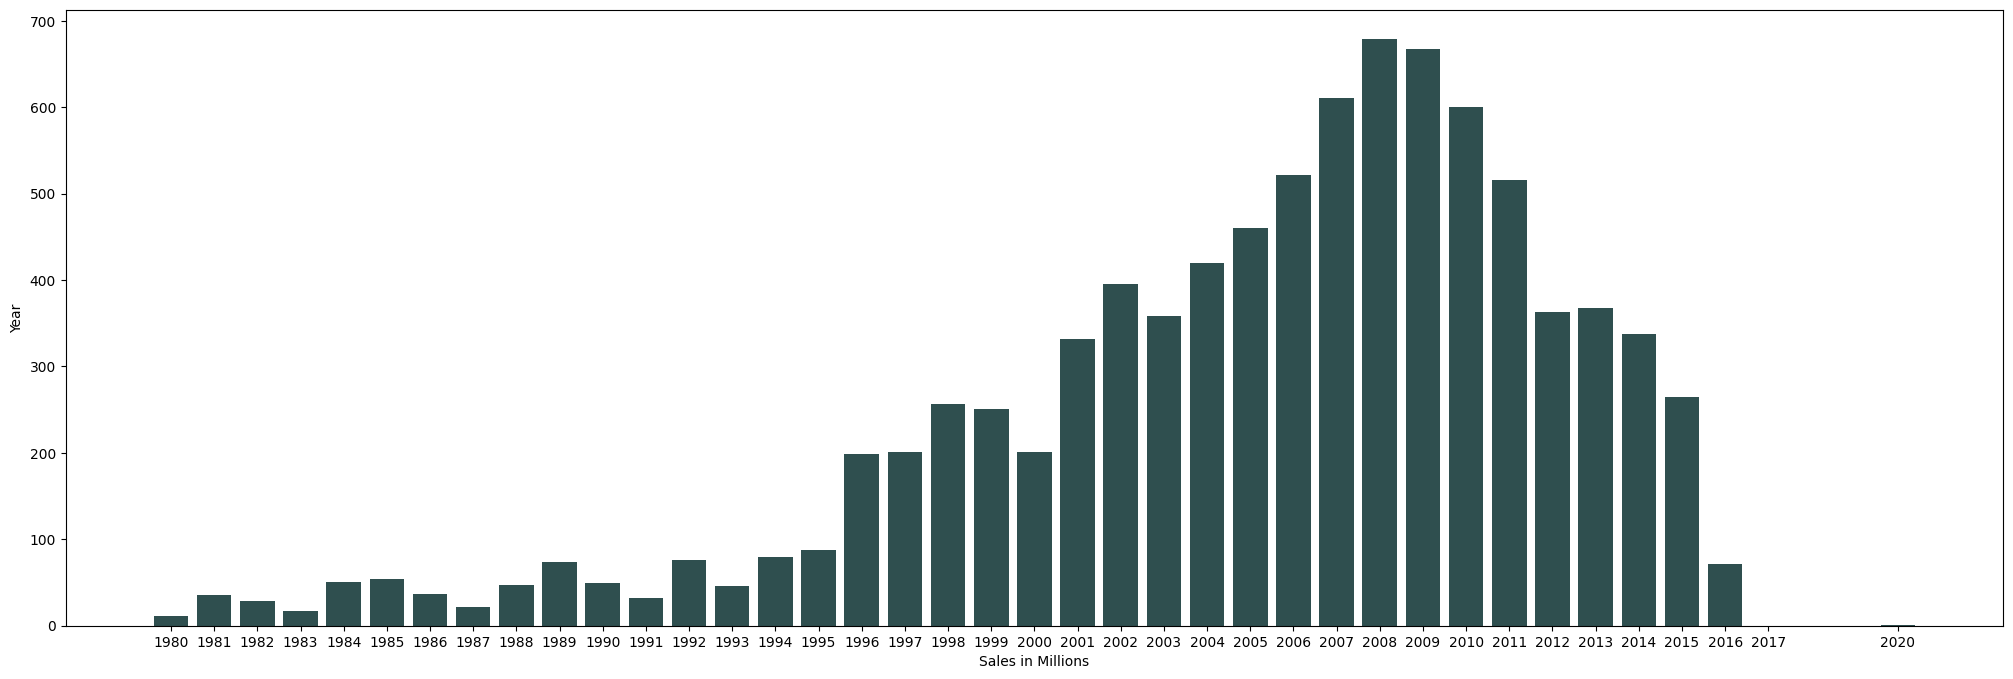

In [6]:
#Global sales by Year analysis

# Group by year, sum the global sales, and then sort in descending order
sales_by_year = df.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(25,8))

#Making a visual for sales by Year
plt.bar(sales_by_year.index,sales_by_year.values,color='#2F4F4F')
plt.xticks(sales_by_year.index)
plt.xlabel("Sales in Millions")
plt.ylabel("Year")

#The most games sales were between 2005 and 2010, the highest being 2008.

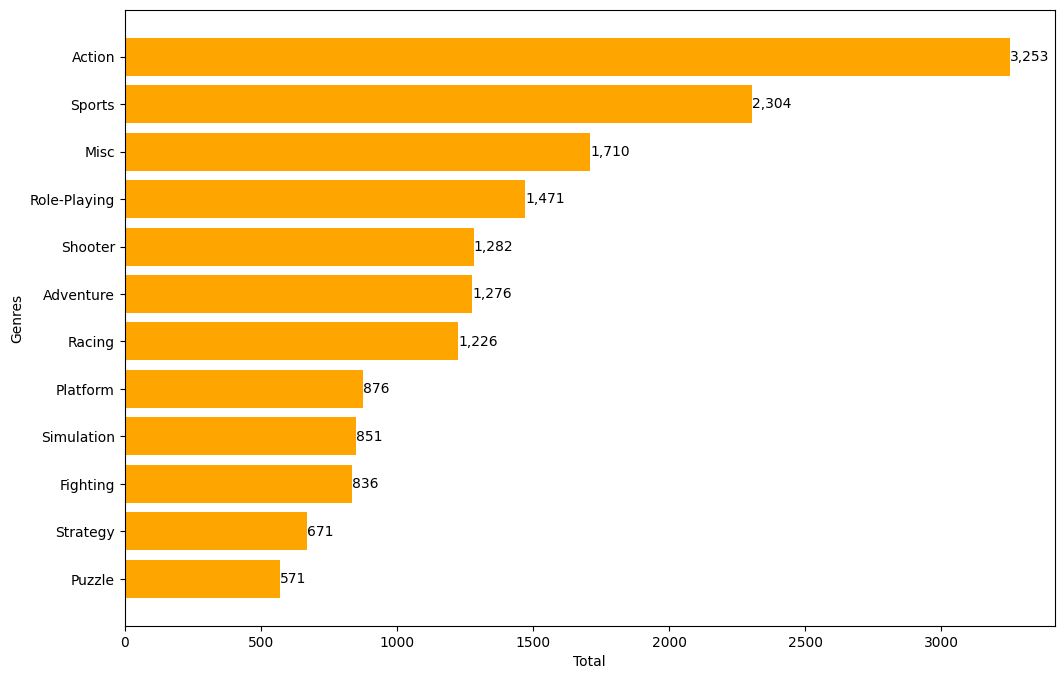

In [7]:
#Genre Analysis

genres = df["Genre"].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12,8))

plt.barh(genres.index,genres.values,color="#FFA500")
plt.xlabel("Total")
plt.ylabel("Genres")

#Adding value labels to each bar
for index, value in enumerate(genres.values):
    plt.text(value,index,f"{value:,}",va="center")

#Action & Sports are some of the most popular Genres

Text(0, 0.5, ' AVG Sales')

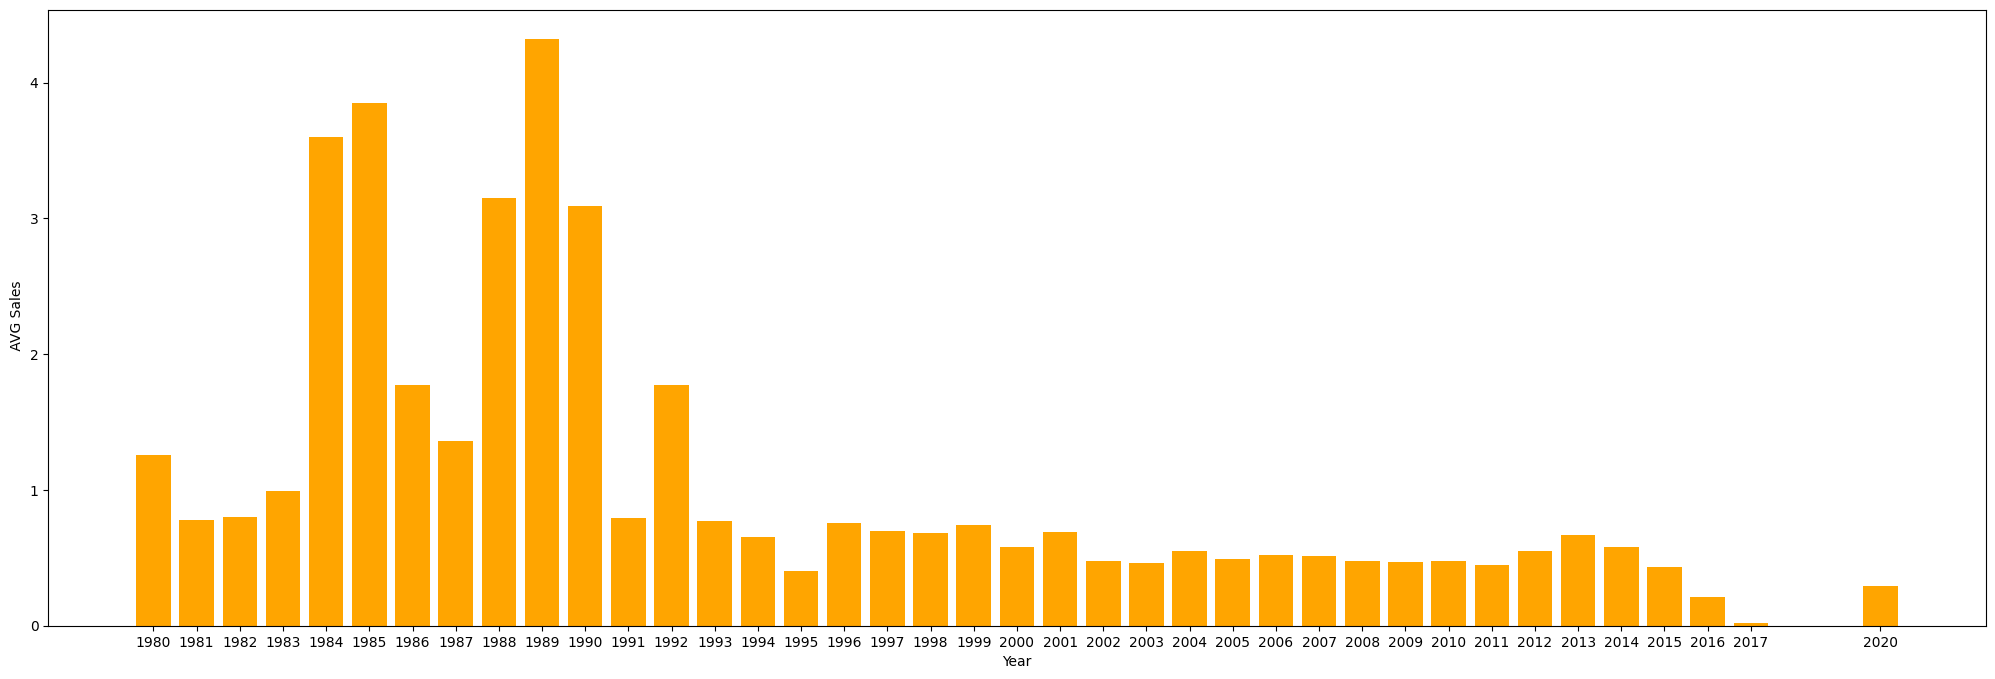

In [341]:
#Average global sales by Year analysis

avg_sales_by_year= round(df.groupby("Year")["Global_Sales"].mean().sort_values(ascending=False),2)
plt.figure(figsize=(25,8))
plt.bar(avg_sales_by_year.index,avg_sales_by_year.values,color='#FFA500')

plt.xticks(avg_sales_by_year.index)
plt.xlabel("Year")
plt.ylabel(" AVG Sales")

Text(0.5, 0, 'Global Sales (in millions)')

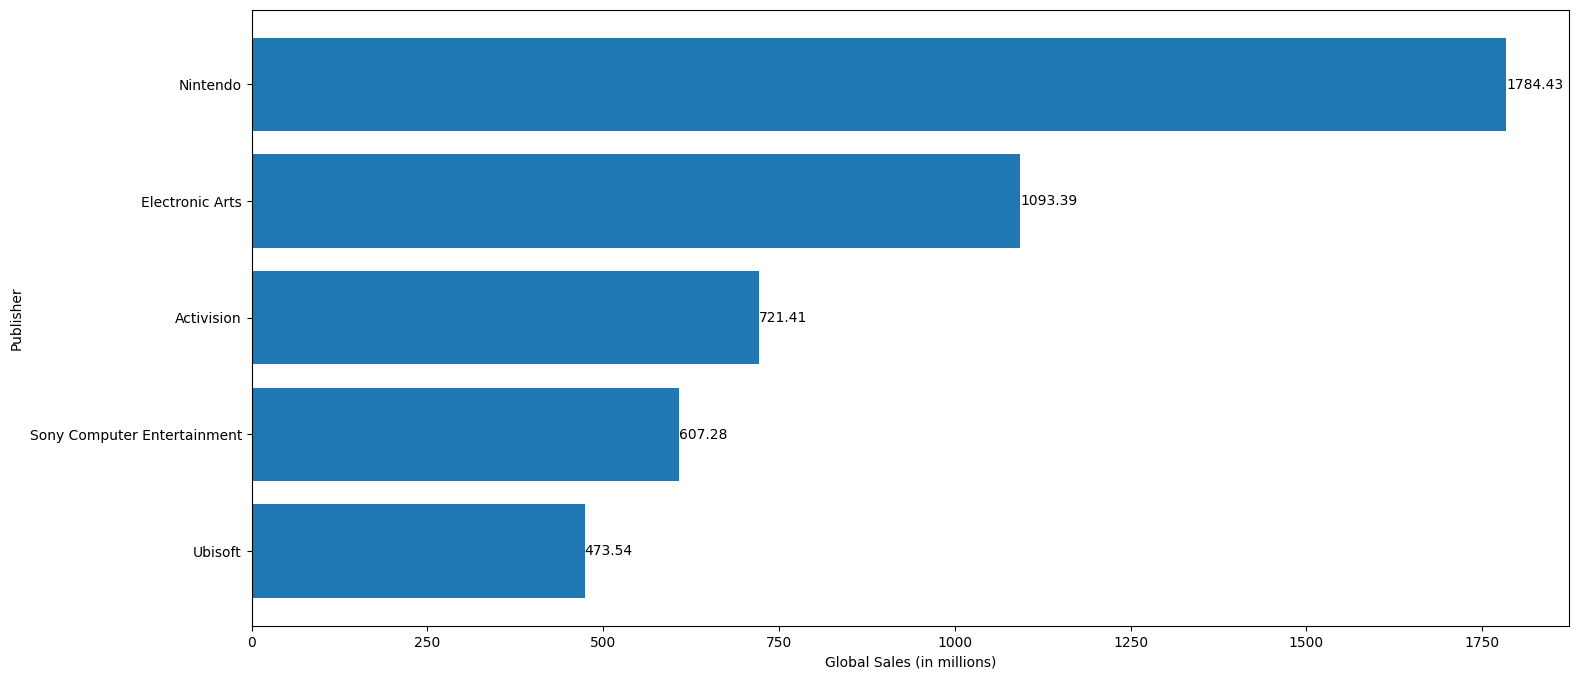

In [8]:
#Top 5 publishers by global sales

top_publishers_by_sales = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
top_5_publishers = top_publishers_by_sales.head(5)

plt.figure(figsize=(17,8))

plt.barh(top_5_publishers.index,top_5_publishers.values)
plt.gca().invert_yaxis()

for index, value in enumerate(top_5_publishers.values):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.ylabel("Publisher")
plt.xlabel("Global Sales (in millions)")